Indonesia Bagian Data:
1. Amjad Adhie
2. Iskandar Muda
3. Raka Admiharfan Fatihah

Import Library

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf


Dataset

In [2]:
train = pd.read_csv('dataset/train_features.csv')
train.insert(0, 'ID', 0)
train.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [3]:
test_set = pd.read_csv('dataset/test_features.csv')
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [4]:
label = pd.read_csv('dataset/train_labels.csv')
label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [5]:
# Menggabungkan data train dan label
train_set = train.join(label)

# EDA (Exploratory Data Analysis)

In [6]:
# memeriksa setiap kolom dari data train yang kosong
train_set.isnull().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

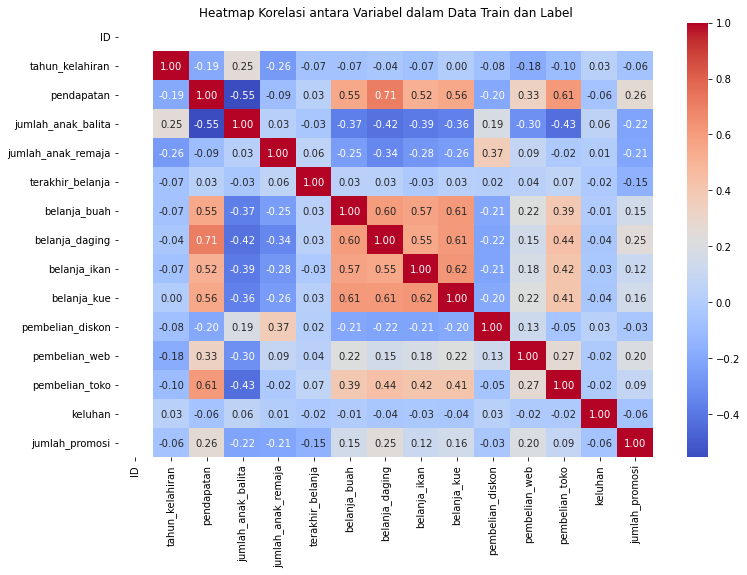

In [7]:
# Menghitung korelasi antara variabel numerik
corr = train_set.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel dalam Data Train dan Label')
plt.show()

In [8]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


## Data Preparation

### Drop Duplicate Data

In [9]:
# drop row has similar value
print("Rows before dropping duplicates:", len(train_set))
train_set.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train_set))

train_set.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 3817
Rows after dropping duplicates: 3817


No duplicate rows in the training data.

In [10]:
# Drop row has all NaN value
print("Rows before dropping all NaN value:", len(train_set))
train_set.dropna(how='all', inplace=True)
print("Rows after dropping all NaN value:", len(train_set))


Rows before dropping all NaN value: 3817
Rows after dropping all NaN value: 3817


In [11]:
# Drop column tanggal_menjadi_anggota
train_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
0,0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0
2,0,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1
3,0,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4
4,0,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4


In [12]:
# Drop column tanggal_menjadi_anggota pada test_set
test_set.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
test_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0


## Split Training Set and Validation Set

In [13]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train_set.copy()

# Split training set and validation set
train_set, val_set = train_test_split(train_set, test_size=0.2, stratify=train_set['jumlah_promosi'], random_state=42)

In [14]:
train_set.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
2329,0,1962,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,3
394,0,1973,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,6
981,0,1951,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,1
1199,0,1966,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,NaN,4.0,0.0,5
3137,0,1959,Sarjana,Menikah,150100639.0,0.0,NaN,46.0,127193.0,307425.0,90571.0,44549.0,NaN,7.0,8.0,0.0,4


In [15]:
print(len(train_set))
print(len(val_set))

3053
764


## Preprocessing

### Handle Missing Values¶

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053 entries, 2329 to 206
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3053 non-null   int64  
 1   tahun_kelahiran     3053 non-null   int64  
 2   pendidikan          2899 non-null   object 
 3   status_pernikahan   2879 non-null   object 
 4   pendapatan          2898 non-null   float64
 5   jumlah_anak_balita  2898 non-null   float64
 6   jumlah_anak_remaja  2904 non-null   float64
 7   terakhir_belanja    2907 non-null   float64
 8   belanja_buah        2912 non-null   float64
 9   belanja_daging      2909 non-null   float64
 10  belanja_ikan        2897 non-null   float64
 11  belanja_kue         2884 non-null   float64
 12  pembelian_diskon    2909 non-null   float64
 13  pembelian_web       2926 non-null   float64
 14  pembelian_toko      2916 non-null   float64
 15  keluhan             2887 non-null   float64
 16  juml

In [17]:
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2464 to 2265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  764 non-null    int64  
 1   tahun_kelahiran     764 non-null    int64  
 2   pendidikan          729 non-null    object 
 3   status_pernikahan   726 non-null    object 
 4   pendapatan          729 non-null    float64
 5   jumlah_anak_balita  729 non-null    float64
 6   jumlah_anak_remaja  709 non-null    float64
 7   terakhir_belanja    738 non-null    float64
 8   belanja_buah        724 non-null    float64
 9   belanja_daging      730 non-null    float64
 10  belanja_ikan        727 non-null    float64
 11  belanja_kue         719 non-null    float64
 12  pembelian_diskon    730 non-null    float64
 13  pembelian_web       726 non-null    float64
 14  pembelian_toko      732 non-null    float64
 15  keluhan             734 non-null    float64
 16  juml

In [18]:
# Split numerical and categorical variables
num_feat = train_set.select_dtypes(include=['int', 'float'])
cat_feat = train_set.select_dtypes(include=['object'])

num_feat_val = val_set.select_dtypes(include=['int', 'float'])
cat_feat_val = val_set.select_dtypes(include=['object'])

In [19]:
def feat_null_pct(num, data):
    missing = num.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    for col in nans.index:
        print(f"{col} Null Values: {round(100 - data[col].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[col].value_counts().sum()})")

print("Missing numerical train data: ")
feat_null_pct(num_feat, train_set)
print()
print("Missing categorical train data:")
feat_null_pct(cat_feat, train_set)

Missing numerical train data: 
belanja_kue Null Values: 5.54% of the dataset (169)
keluhan Null Values: 5.44% of the dataset (166)
belanja_ikan Null Values: 5.11% of the dataset (156)
jumlah_anak_balita Null Values: 5.08% of the dataset (155)
pendapatan Null Values: 5.08% of the dataset (155)
jumlah_anak_remaja Null Values: 4.88% of the dataset (149)
terakhir_belanja Null Values: 4.78% of the dataset (146)
pembelian_diskon Null Values: 4.72% of the dataset (144)
belanja_daging Null Values: 4.72% of the dataset (144)
belanja_buah Null Values: 4.62% of the dataset (141)
pembelian_toko Null Values: 4.49% of the dataset (137)
pembelian_web Null Values: 4.16% of the dataset (127)

Missing categorical train data:
status_pernikahan Null Values: 5.7% of the dataset (174)
pendidikan Null Values: 5.04% of the dataset (154)


In [20]:
print("Missing numerical validation data: ")
feat_null_pct(num_feat_val, val_set)
print()
print("Missing categorical validation data:")
feat_null_pct(cat_feat_val, val_set)

Missing numerical validation data: 
jumlah_anak_remaja Null Values: 7.2% of the dataset (55)
belanja_kue Null Values: 5.89% of the dataset (45)
belanja_buah Null Values: 5.24% of the dataset (40)
pembelian_web Null Values: 4.97% of the dataset (38)
belanja_ikan Null Values: 4.84% of the dataset (37)
jumlah_anak_balita Null Values: 4.58% of the dataset (35)
pendapatan Null Values: 4.58% of the dataset (35)
pembelian_diskon Null Values: 4.45% of the dataset (34)
belanja_daging Null Values: 4.45% of the dataset (34)
pembelian_toko Null Values: 4.19% of the dataset (32)
keluhan Null Values: 3.93% of the dataset (30)
terakhir_belanja Null Values: 3.4% of the dataset (26)

Missing categorical validation data:
status_pernikahan Null Values: 4.97% of the dataset (38)
pendidikan Null Values: 4.58% of the dataset (35)


In [21]:
# Create custom imputer class
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class FeatureImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):

        # Impute pendidikan column
        self.pendidikan_imputer = SimpleImputer(strategy='most_frequent')
        self.pendidikan_imputer.fit(X[['pendidikan']])

        # Impute status_pernikahan column
        self.status_pernikahan_imputer = SimpleImputer(strategy="most_frequent")
        self.status_pernikahan_imputer.fit(X[['status_pernikahan']])

        # Impute keluhan column with modus
        self.keluhan_imputer = SimpleImputer(strategy='most_frequent')
        self.keluhan_imputer.fit(X[['keluhan']])
        
        # Impute jumlah_anak_remaja column
        self.jumlah_anak_remaja_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_remaja_imputer.fit(X[['jumlah_anak_remaja']])

        # Impute jumlah_anak_balita column
        self.jumlah_anak_balita_imputer = SimpleImputer(strategy="constant", fill_value=0)
        self.jumlah_anak_balita_imputer.fit(X[['jumlah_anak_balita']])

        # Impute belanja_kue column with median
        self.belanja_kue_imputer = SimpleImputer(strategy='median')
        self.belanja_kue_imputer.fit(X[['belanja_kue']])

        # Impute belanja_daging column with median
        self.belanja_daging_imputer = SimpleImputer(strategy='median')
        self.belanja_daging_imputer.fit(X[['belanja_daging']])

        # Impute belanja_ikan column with median
        self.belanja_ikan_imputer = SimpleImputer(strategy='median')
        self.belanja_ikan_imputer.fit(X[['belanja_ikan']])

        # Impute belanja_buah column with median
        self.belanja_buah_imputer = SimpleImputer(strategy='median')
        self.belanja_buah_imputer.fit(X[['belanja_buah']])

        # Impute pembelian_diskon column with median
        self.pembelian_diskon_imputer = SimpleImputer(strategy='median')
        self.pembelian_diskon_imputer.fit(X[['pembelian_diskon']])

        # Impute pembelian_web column with median
        self.pembelian_web_imputer = SimpleImputer(strategy='median')
        self.pembelian_web_imputer.fit(X[['pembelian_web']])

        # Impute pembelian_toko column with median
        self.pembelian_toko_imputer = SimpleImputer(strategy='median')
        self.pembelian_toko_imputer.fit(X[['pembelian_toko']])

        # Impute pendapatan column with median
        self.pendapatan_imputer = SimpleImputer(strategy='median')
        self.pendapatan_imputer.fit(X[['pendapatan']])

        # Impute terakhir_belanja column with median
        self.terakhir_belanja_imputer = SimpleImputer(strategy='median')
        self.terakhir_belanja_imputer.fit(X[['terakhir_belanja']])

        
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        # Apply imputation to the '
        X_imputed['pendidikan'] = self.pendidikan_imputer.transform(X[['pendidikan']])
        X_imputed['status_pernikahan'] = self.status_pernikahan_imputer.transform(X[['status_pernikahan']])
        X_imputed['keluhan'] = self.keluhan_imputer.transform(X[['keluhan']])
        X_imputed['jumlah_anak_remaja'] = self.jumlah_anak_remaja_imputer.transform(X[['jumlah_anak_remaja']])
        X_imputed['jumlah_anak_balita'] = self.jumlah_anak_balita_imputer.transform(X[['jumlah_anak_balita']])
        X_imputed['belanja_kue'] = self.belanja_kue_imputer.transform(X[['belanja_kue']])
        X_imputed['belanja_daging'] = self.belanja_daging_imputer.transform(X[['belanja_daging']])
        X_imputed['belanja_ikan'] = self.belanja_ikan_imputer.transform(X[['belanja_ikan']])
        X_imputed['belanja_buah'] = self.belanja_buah_imputer.transform(X[['belanja_buah']])
        X_imputed['pembelian_diskon'] = self.pembelian_diskon_imputer.transform(X[['pembelian_diskon']])
        X_imputed['pembelian_web'] = self.pembelian_web_imputer.transform(X[['pembelian_web']])
        X_imputed['pembelian_toko'] = self.pembelian_toko_imputer.transform(X[['pembelian_toko']])
        X_imputed['pendapatan'] = self.pendapatan_imputer.transform(X[['pendapatan']])
        X_imputed['terakhir_belanja'] = self.terakhir_belanja_imputer.transform(X[['terakhir_belanja']])
               
        return X_imputed

### Feature Creation¶

In [22]:
n_promosi = 7
most_freq_promosi = train_set['jumlah_promosi'].value_counts()[:n_promosi].index
train_set['jumlah_promosi'].value_counts()[:n_promosi]

0    786
5    445
1    412
4    412
3    378
2    311
6    309
Name: jumlah_promosi, dtype: int64

In [23]:
n_pendidikan = 7
most_freq_pendidikan= train_set['pendidikan'].value_counts()[:n_pendidikan].index
train_set['pendidikan'].value_counts()[:n_pendidikan]

Sarjana     1450
Magister     692
SMA          345
Doktor       338
SMP           72
5              2
Name: pendidikan, dtype: int64

In [24]:
# drop row where pendidikan = 5
train_set = train_set[train_set['pendidikan'] != '5']

In [25]:
n_status_pernikahan = 6
most_freq_status_pernikahan= train_set['status_pernikahan'].value_counts()[:n_status_pernikahan].index
train_set['status_pernikahan'].value_counts()[:n_status_pernikahan]

Rencana Menikah    1025
Menikah             901
Sendiri             744
Cerai               175
Cerai Mati           31
5                     1
Name: status_pernikahan, dtype: int64

In [26]:
# drop row where status_pernikahan = 5
train_set = train_set[train_set['status_pernikahan'] != '5']

### Encode Categorical Features

In [27]:
# Create custom encoder class
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Perform one-hot encoding
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

            # Drop original categorical columns from DataFrame
            X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

### Remove Outliers¶
This step is to remove outliers based on a column using the IQR method.

In [28]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

### Handle Imbalances

In [29]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=y.value_counts().index)
    
    print(y.value_counts())
    print()

Sarjana     1450
Magister     692
SMA          345
Doktor       337
SMP           72
Name: pendidikan, dtype: int64



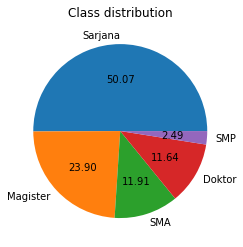

In [30]:
plot_classes(train_set['pendidikan'])

## Prepare Training and Validation set
All of the preprocessing steps will be compiled in this section.

### Fitting the Pipeline¶
We will pass down the training and validation set through a pipeline that performs the preprocessing steps defined before.

In [31]:
from sklearn.pipeline import Pipeline

pipeline_val = Pipeline([("imputer", FeatureImputer()),
                    ("encoder", FeatureEncoder())])

In [32]:
train_set = pipeline_val.fit_transform(train_set)
val_set = pipeline_val.transform(val_set)

In [33]:
train_set.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pendidikan_Doktor,pendidikan_Magister,pendidikan_SMA,pendidikan_SMP,pendidikan_Sarjana,status_pernikahan_Cerai,status_pernikahan_Cerai Mati,status_pernikahan_Menikah,status_pernikahan_Rencana Menikah,status_pernikahan_Sendiri
2329,0,1962,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,...,1,0,0,0,0,1,0,0,0,0
394,0,1973,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,...,1,0,0,0,0,0,0,0,1,0
981,0,1951,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,...,0,0,0,0,1,0,0,0,1,0
1199,0,1966,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,...,0,0,0,0,1,0,0,0,0,1
3137,0,1959,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,...,0,0,0,0,1,0,0,1,0,0
